In [1]:
!unzip '/content/archive (9).zip'

Archive:  /content/archive (9).zip
  inflating: spam.csv                


Approach to NLP Problems (Discriminative)



*  Load the data and libraries (NLTK, Gensim, Spacy)

*  Data Preparation and Transformation

                 *  Tokenization
                 *   Remove special characters
                 *   Lemmatization/Stemming
                 *  Remove stop words
                *  Lower Case


*  Vectorization (Gensim, SkLearn, Keras)

*  Count Vectorizer
* TF IDF Vectorizer

* Word2Vec


*   Embedding (Keras)




*   Build a model
*   ML Model: Boosting/Bagging,Naive bayes

*   Deep Learning Model: Dense, RNN, LSTM
*   Evaluate


*  Predict














In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import the data

In [3]:
data=pd.read_csv('/content/spam.csv',encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


drop off the inconsistent columns

In [6]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


re=regular expression

In [9]:
data.columns = ['label','text']

<Axes: xlabel='label'>

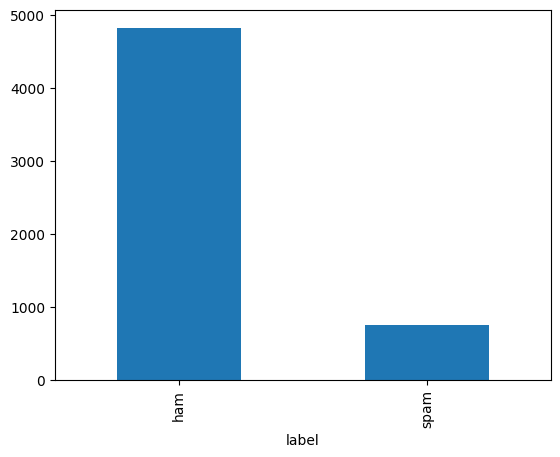

In [10]:
data['label'].value_counts().plot(kind='bar')

In [11]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def data_prep(text):
  text=re.sub('[^a-zA-Z]',' ',text)
  text=text.lower()
  text = word_tokenize(text)
  lemmatizer = nltk.WordNetLemmatizer() # Create an instance of WordNetLemmatizer
  text = [lemmatizer.lemmatize(word) for word in text] # Lemmatize each word using the instance
  text = [word for word in text if word not in stopwords.words('english')]
  text = ' '.join(text)
  return text

In [13]:
import nltk
from nltk.corpus import stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

replace all special characters and retain special characters and replace with space

In [14]:
data_1 = data['text'].apply(data_prep)

In [15]:
data_1[0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

using  tfidf pre process the data

In [16]:
vect=TfidfVectorizer()
x=vect.fit_transform(data['text'])

In [17]:
y=data['label']

In [18]:
x.shape

(5572, 8672)

Machine learning models

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 8672)
(1115, 8672)
(4457,)
(1115,)


In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [23]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [24]:
y_hat_train_rf=rf.predict(x_train)
y_hat_test_rf=rf.predict(x_test)

In [25]:
model_eval(y_train,y_hat_train_rf)

The accuracy of the model is: 1.0
[[3860    0]
 [   0  597]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3860
        spam       1.00      1.00      1.00       597

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



In [26]:
model_eval(y_test,y_hat_test_rf)

The accuracy of the model is: 0.98
[[965   0]
 [ 26 124]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.98      1115



Ada boost classifier

In [27]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [28]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_train_ada=ada.predict(x_train)
y_hat_test_ada=ada.predict(x_test)

In [29]:
model_eval(y_train,y_train_ada)

The accuracy of the model is: 0.98
[[3837   23]
 [  57  540]]
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      3860
        spam       0.96      0.90      0.93       597

    accuracy                           0.98      4457
   macro avg       0.97      0.95      0.96      4457
weighted avg       0.98      0.98      0.98      4457



In [30]:
model_eval(y_test,y_hat_test_ada)

The accuracy of the model is: 0.97
[[961   4]
 [ 27 123]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.97      0.82      0.89       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



Gradient Boosting Classifier

In [31]:
gb=GradientBoostingClassifier(n_estimators=150)
gb.fit(x_train,y_train)
y_hat_train_gb=gb.predict(x_train)
y_hat_test_gb=gb.predict(x_test)

In [32]:
model_eval(y_train,y_hat_train_gb)

The accuracy of the model is: 0.99
[[3856    4]
 [  37  560]]
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      3860
        spam       0.99      0.94      0.96       597

    accuracy                           0.99      4457
   macro avg       0.99      0.97      0.98      4457
weighted avg       0.99      0.99      0.99      4457



In [33]:
model_eval(y_test,y_hat_test_gb)

The accuracy of the model is: 0.97
[[963   2]
 [ 27 123]]
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       0.98      0.82      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



XGBoost classifier

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb=XGBClassifier()

In [36]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)  # Transform string labels to numerical labels

xgb.fit(x_train,y_train)  # Now fit the model with numerical labels
y_hat_train_xgb = xgb.predict(x_train)

# Remember to transform y_test as well before making predictions
y_test = le.transform(y_test)
y_hat_test_xgb = xgb.predict(x_test)

In [37]:
model_eval(y_train,y_hat_train_xgb)

The accuracy of the model is: 1.0
[[3859    1]
 [   7  590]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      0.99      0.99       597

    accuracy                           1.00      4457
   macro avg       1.00      0.99      1.00      4457
weighted avg       1.00      1.00      1.00      4457



In [38]:
model_eval(y_test,y_hat_test_xgb)

The accuracy of the model is: 0.98
[[962   3]
 [ 17 133]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.89      0.93       150

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
ml=MultinomialNB()
ml.fit(x_train,y_train)
y_hat_train_ml=ml.predict(x_train)
y_hat_test_ml=ml.predict(x_test)

In [41]:
model_eval(y_train,y_hat_train_ml)

The accuracy of the model is: 0.97
[[3860    0]
 [ 132  465]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3860
           1       1.00      0.78      0.88       597

    accuracy                           0.97      4457
   macro avg       0.98      0.89      0.93      4457
weighted avg       0.97      0.97      0.97      4457



In [42]:
model_eval(y_test,y_hat_test_ml)

The accuracy of the model is: 0.96
[[965   0]
 [ 42 108]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



Create a app

In [43]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 71.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [44]:
import gradio as gr

def predict_spam(text):
    text_cleared = data_prep(text)  # Assuming data_prep is a function you've defined elsewhere
    text_vectorized = vect.transform([text_cleared])  # Assuming vect is a pre-trained vectorizer
    prediction = ml.predict(text_vectorized)[0]  # Assuming ml is your trained model
    return "Spam" if prediction == "spam" else "Ham"

iface = gr.Interface(
    fn=predict_spam,
    inputs=gr.Textbox(lines=5, label="Enter your text message here:"),
    outputs="text",
    title="Spam Detection App",
    description="Enter a message to predict whether it's spam or ham."
)

iface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://002b93221e6c41f519.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


RNN based model

In [45]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense,LSTM,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

We are not using stopwords here

Tokenize Text

In [46]:
#tokenize the messages
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])

In [47]:
tokenizer.word_index            # takes dictionary, takes token as input and converts to numbers

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'call': 16,
 'have': 17,
 'on': 18,
 '2': 19,
 'that': 20,
 'now': 21,
 'are': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'do': 27,
 'can': 28,
 'at': 29,
 "i'm": 30,
 'get': 31,
 'be': 32,
 'will': 33,
 'if': 34,
 'ur': 35,
 'with': 36,
 'just': 37,
 'no': 38,
 'we': 39,
 'this': 40,
 'gt': 41,
 '4': 42,
 'lt': 43,
 'up': 44,
 'when': 45,
 'ok': 46,
 'free': 47,
 'from': 48,
 'how': 49,
 'go': 50,
 'all': 51,
 'out': 52,
 'what': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'got': 58,
 'was': 59,
 'come': 60,
 'its': 61,
 'am': 62,
 'time': 63,
 'only': 64,
 'day': 65,
 'love': 66,
 'there': 67,
 'send': 68,
 'he': 69,
 'want': 70,
 'text': 71,
 'as': 72,
 'txt': 73,
 'one': 74,
 'going': 75,
 'by': 76,
 'home': 77,
 "i'll": 78,
 'need': 79,
 'about': 80,
 'r': 81,
 'lor': 82,
 'sorry': 83,
 'stop': 84,
 'st

In [48]:
len(tokenizer.word_index)

8920

In [49]:
data['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
len(data['text'][1])

29

Padding

In [51]:
max_length = 100
x=pad_sequences(sequences, maxlen=max_length)

In [52]:
x.shape

(5572, 100)

In [53]:
x[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,   46,  336, 1495,  470,    6,
       1929], dtype=int32)

split the data to train and test

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 100)
(1115, 100)
(4457,)
(1115,)


In [57]:
from keras.utils import to_categorical
#convert labels to numerical values (0 for ham,1 for spam)
y_train = [1 if labels == 'spam' else 0 for labels in y_train]
y_test = [1 if labels == 'spam' else 0 for labels in y_test]
y_train= to_categorical(y_train)
y_test= to_categorical(y_test)

model the data

In [60]:
x_train.shape

(4457, 100)

In [61]:
y_train.shape

(4457, 1)

In [66]:
model=Sequential()
model.add(Embedding(input_dim=max_words,output_dim=100,input_length=100))        #8970 means converts to 100  ,input length 100 bcz itll take 100 input tokens
model.add(SimpleRNN(units=64))           #64 Rnn cells
model.add(Dense(units=1,activation='sigmoid'))    #2class problems  #2 units because whether its ham or spam

# Compile the model before calling fit
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.9863 - loss: 0.0985 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 1.0000 - loss: 9.1120e-04 - val_accuracy: 1.0000 - val_loss: 4.8290e-04
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step - accuracy: 1.0000 - loss: 4.0875e-04 - val_accuracy: 1.0000 - val_loss: 2.7430e-04
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 1.0000 - loss: 2.4136e-04 - val_accuracy: 1.0000 - val_loss: 1.8048e-04
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 1.0000 - loss: 1.6239e-04 - val_accuracy: 1.0000 - val_loss: 1.2917e-04
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 1.0000 - loss: 1.1781e-04 - val_accuracy: 1.0000 - val_loss: 9.7599e-05
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 1.0000 - loss: 8.9805e-05 - val_accuracy: 1.0000 - val_loss: 7.6583e-05
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - 

confusion matrix , app

In [67]:
def model_eval(actual,predicted):
  conf_matrix=confusion_matrix(actual,predicted)
  clas_rep=classification_report(actual,predicted)
  acc_score=accuracy_score(actual,predicted)
  print("The accuracy of the model is:",round(acc_score,2))
  print(conf_matrix)
  print(clas_rep)

In [68]:
from keras.layers import SimpleRNN

In [69]:
y_train=np.argmax(y_train,axis=1)
y_test=np.argmax(y_test,axis=1)

In [70]:
y_hat_train_rnn=np.argmax(model.predict(x_train),axis=1)
y_hat_test_rnn=np.argmax(model.predict(x_test),axis=1)

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [71]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
y_hat_train_rnn

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
model_eval(y_train,y_hat_train_rnn)

The accuracy of the model is: 1.0
[[4457]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4457

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457



In [74]:
model_eval(y_test,y_hat_test_rnn)

The accuracy of the model is: 1.0
[[1115]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115



In [75]:
# prompt: create an app using rnn to get text as input to get spam or ham as output

def predict_spam_rnn(text):
  text_seq = tokenizer.texts_to_sequences([text])
  text_pad = pad_sequences(text_seq, maxlen=max_length)
  prediction = model.predict(text_pad)
  return "Spam" if np.argmax(prediction) == 1 else "Ham"

iface = gr.Interface(
    fn=predict_spam_rnn,
    inputs=gr.Textbox(lines=5, label="Enter your text message here:"),
    outputs="text",
    title="Spam Detection App",
    description="Enter a message to predict whether it's spam or ham."
)

iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://74725b8705f7013b06.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
